In [1]:
import pandas as pd
import matplotlib.pyplot as plt

marketing_df = pd.read_csv("C:/Users/agom2/OneDrive/Desktop/Poertfolio/file.csv")
marketing_df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [2]:
number_of_total_buyers = len(marketing_df["CustomerID"])
print(f"The total number of buyers is: {number_of_total_buyers}")

unique_buyer = marketing_df["CustomerID"].nunique()
print(f"The number of customers is: {unique_buyer}")

unique_products = marketing_df["Product_SKU"].nunique()
print(f"The number of unique products is: {unique_products}")

catigories = marketing_df["Product_Category"].nunique()
print(f"The number of product catigories is: {catigories}")

number_of_coupons_used = len(marketing_df["Coupon_Code"])
print(f"The number of coupons used is: {number_of_coupons_used}")

number_of_locations = marketing_df["Location"].nunique()
print(f"The number of locations is: {number_of_locations}")

total_revenu = marketing_df["Avg_Price"].sum()
print(f"The total revenue is {total_revenu}")



The total number of buyers is: 52955
The number of customers is: 1468
The number of unique products is: 1145
The number of product catigories is: 21
The number of coupons used is: 52955
The number of locations is: 5
The total revenue is 2764625.2


Text(0.5, 1.0, 'Count of city sales')

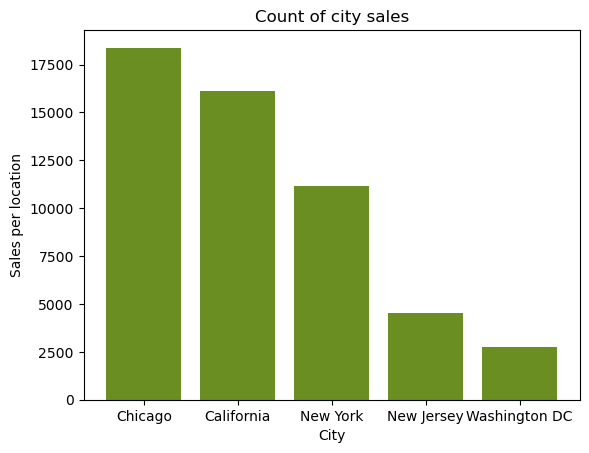

In [3]:
city_count = marketing_df["Location"].value_counts()

x_axis = city_count.index.values
y_axis = city_count.values
plt.bar(x_axis, y_axis, color= 'olivedrab')

plt.xlabel("City")
plt.ylabel("Sales per location")
plt.title("Count of city sales")


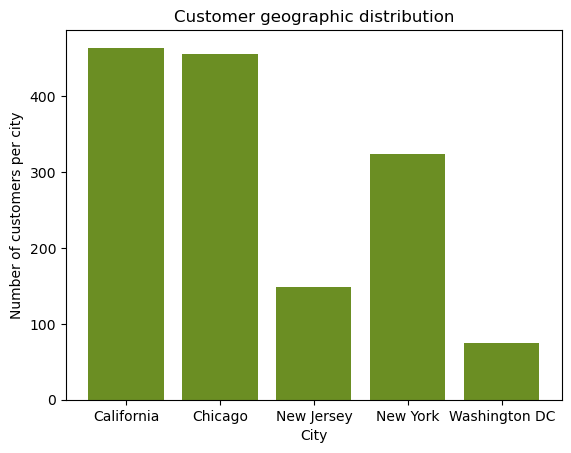

In [4]:
unique_customer_per_city = marketing_df.groupby("Location")["CustomerID"].nunique()
unique_customer_per_city2=pd.DataFrame(unique_customer_per_city)

x_axis1 = unique_customer_per_city.index.values
y_axis1 = unique_customer_per_city.values
plt.bar(x_axis1, y_axis1, color= 'olivedrab')
plt.xlabel("City")
plt.ylabel("Number of customers per city")
plt.title("Customer geographic distribution")
unique_customer_per_city2.to_csv('unique_customer_per_city.csv', index=True)



In [5]:
City_df = pd.DataFrame(marketing_df.groupby("Location")["Avg_Price"].count())
City_df

,Avg_Price
Location,
California,16136
Chicago,18380
New Jersey,4503
New York,11173
Washington DC,2732


Text(0.5, 1.0, 'Daily customer count')

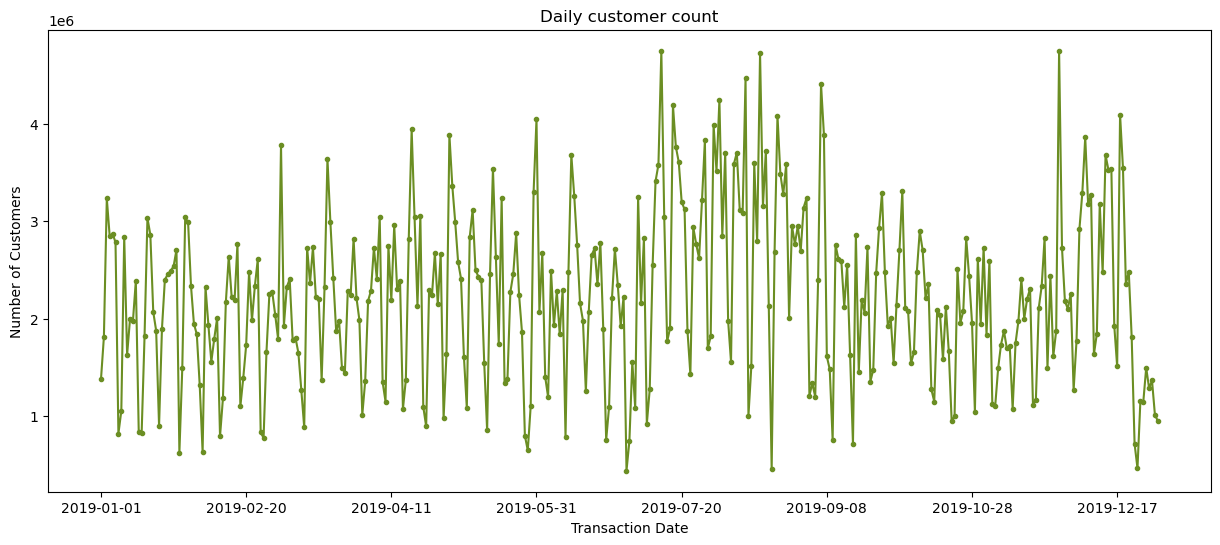

In [6]:
cust_per_day =marketing_df.groupby("Transaction_Date")["CustomerID"].sum()
plt.figure(figsize=(15, 6))
cust_per_day.plot(kind='line', marker='.', linestyle='-', color='olivedrab')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Customers')
plt.title('Daily customer count')

The total number of sales done by males is 19917
The total number of sales done by females is 33007


Text(0.5, 1.0, 'Male and female customer distrubution')

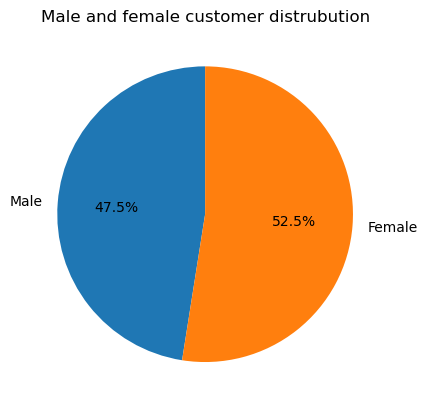

In [7]:
male_count = marketing_df["Gender"][marketing_df.Gender == "M"].count()
female_count = marketing_df["Gender"][marketing_df.Gender =="F"].count()
print(f"The total number of sales done by males is {male_count}")
print(f"The total number of sales done by females is {female_count}")

male_labes = ["Male","Female"]
female_specs = [19917, 22007]
gender_graph = plt.pie(female_specs, labels=male_labes ,autopct='%1.1f%%', startangle=90)
plt.title("Male and female customer distrubution")


26.127994860554757
50.0
2.0


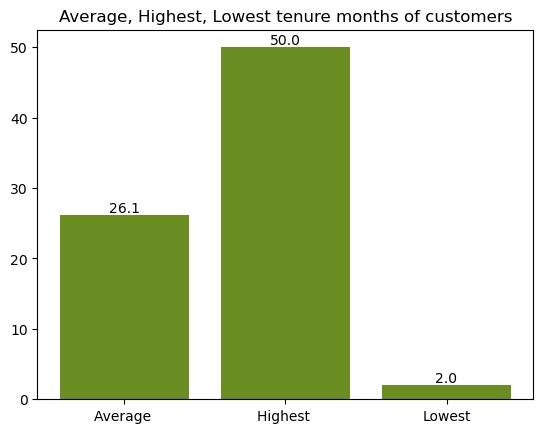

In [8]:
#average tenure months 
average_tenure_months = marketing_df["Tenure_Months"].mean()
print(average_tenure_months)
#highest month
max_tenure = marketing_df["Tenure_Months"].max()
print(max_tenure)
#lowest month 
min_tenure = marketing_df["Tenure_Months"].min()
print(min_tenure)

labes = ['Average ', 'Highest ','Lowest']
sise = [26.127,50,2]
bars=plt.bar(labes, sise, color= 'olivedrab')
plt.title("Average, Highest, Lowest tenure months of customers")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')


In [9]:
#finding who has the highest and lowest tenure months
tenure_months_df =pd.DataFrame(marketing_df.groupby("CustomerID")["Tenure_Months"].count())
tenure_months_df.head()
#lowest tenure months
tenure_sorted = tenure_months_df.sort_values(by = "Tenure_Months", ascending = True)
tenure_sorted.head()
tenure_months_df_sorted=tenure_months_df.to_csv("tenure_months_df", index = True)




In [10]:
#highest tenure months
tenure_sorted2 = tenure_months_df.sort_values(by = "Tenure_Months", ascending= False)
tenure_sorted2.head()

,Tenure_Months
CustomerID,
12748.0,695
15311.0,587
14606.0,575
17841.0,572
14911.0,523


365
335
27
144.9972602739726


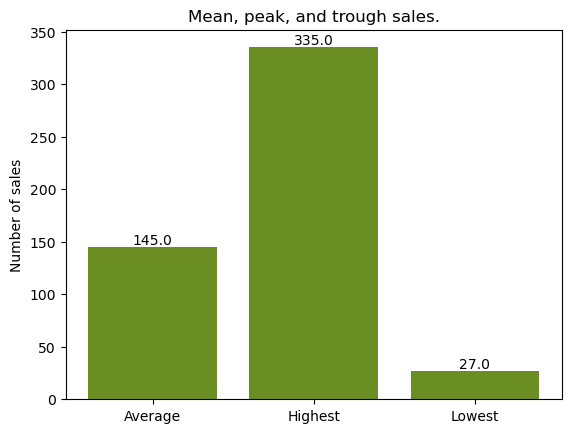

In [11]:
#how many days/max min
number_of_days = marketing_df["Transaction_Date"].nunique()
print(number_of_days)
# day with the higest number of sales 
cust_per_day1 = marketing_df.groupby("Transaction_Date")["CustomerID"].count()
max_num_day_sale = cust_per_day1.max()
print(max_num_day_sale)
#lowest sale date
min_num_day_sale = cust_per_day1.min()
print(min_num_day_sale)
#avrage sales perday
average_sale_day = cust_per_day1.mean()
print(average_sale_day)
cust_per_day1_sorted=cust_per_day1.to_csv("cust_per_day1.csv", index = True)

sale_data = ['Average', 'Highest', 'Lowest']
sale_nums = [144.99,335,27]
sale_per_day = plt.bar(sale_data, sale_nums, color= 'olivedrab')
plt.ylabel("Number of sales")
plt.title("Mean, peak, and trough sales.")

for bar in sale_per_day:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

In [12]:
#finding lowest sales per day
day_sales_df = pd.DataFrame(marketing_df.groupby('Transaction_Date')["CustomerID"].count())
day_sales_df.head()
day_sales_df_sorted = day_sales_df.sort_values(by = "CustomerID", ascending=True)
day_sales_df_sorted.head()
day_sales_df_sorted=day_sales_df.to_csv("day_sales_df.csv", index = True)

In [13]:
#findinng what days had the lowest sales
day_sales_df_sorted2 = day_sales_df.sort_values(by = "CustomerID", ascending=False)
day_sales_df_sorted2.head()


,CustomerID
Transaction_Date,
2019-11-27,335
2019-07-13,311
2019-08-16,298
2019-08-02,292
2019-07-31,291


In [14]:

# who had the higest average purchases 
average_cust_purchase = marketing_df.groupby("CustomerID")["Avg_Price"].mean()

#higest average purchase
max_average_cust_purchase = average_cust_purchase.max()
print(max_average_cust_purchase)

#smallest
min_average_cust_purchase = average_cust_purchase.min()
print(min_average_cust_purchase)

#average 
avg_average_cust_purchase = average_cust_purchase.mean()
print(avg_average_cust_purchase)
average_cust_purchase_sorted=average_cust_purchase.to_csv("average_cust_purchase.csv", index = True)



204.0
1.0
52.24707443150368


In [15]:
#finding what customers spent the most 
customer_purchase = pd.DataFrame(marketing_df.groupby('CustomerID')["Avg_Price"].sum())
customer_purchase.head()
customer_purchase_sorted = customer_purchase.sort_values(by = "Avg_Price", ascending=True)
customer_purchase_sorted.head()
customer_purchase_sorted=customer_purchase.to_csv("customer_purchase.csv", index = True)

In [16]:
customer_purchase_sorted2 = customer_purchase.sort_values(by = "Avg_Price", ascending=False)
customer_purchase_sorted2.head()

,Avg_Price
CustomerID,
12748.0,31285.63
14911.0,29721.53
14606.0,29676.79
15311.0,29633.75
17841.0,27616.21


33.80983854215844%
15.284675668020018
50.84694551978095


Text(0.5, 1.0, 'Percentage of Sales Utilizing Coupons')

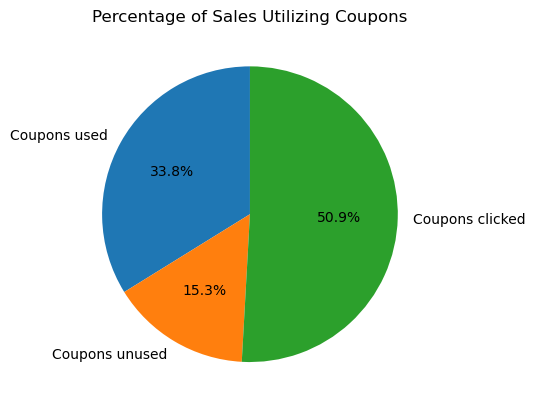

In [17]:
#what percent used coupons? *this is not for unique customes rather the total
percent_of_coupons_used = (marketing_df["Coupon_Status"].value_counts()["Used"]/len(marketing_df["Coupon_Status"]))*100
print(f"{percent_of_coupons_used}%")
#not used
percent_of_coupons_unused = (marketing_df["Coupon_Status"].value_counts()["Not Used"]/len(marketing_df["Coupon_Status"]))*100
print(percent_of_coupons_unused)

#clicked
percent_of_coupons_clicked = (marketing_df["Coupon_Status"].value_counts()["Clicked"]/len(marketing_df["Coupon_Status"]))*100
print(percent_of_coupons_clicked)

coupon_labes = ["Coupons used", "Coupons unused", "Coupons clicked"]
coupon_specs = [33.80,15.284,50.846]
coupon_graph = plt.pie(coupon_specs, labels=coupon_labes,autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Sales Utilizing Coupons")

 Average online: 1893.1091191142013
average offline 2830.9141410324237
Max online: 4556.93
Min online: 320.25
Max offline: 5000.0
Min offline: 500.0


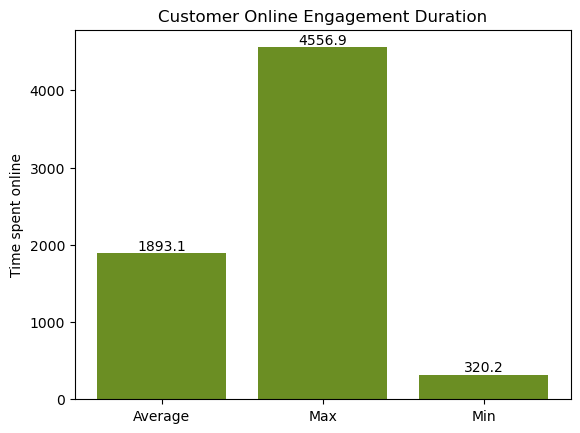

In [18]:
#average time spent offline/online
average_online_time = marketing_df["Online_Spend"].mean()
print(f" Average online: {average_online_time}")

#average offline
average_offline_time = marketing_df["Offline_Spend"].mean()
print(f"average offline {average_offline_time}")

#max online
max_online_spend = marketing_df["Online_Spend"].max()
print(f"Max online: {max_online_spend}")
# min online
min_online_spend = marketing_df["Online_Spend"].min()
print(f"Min online: {min_online_spend}")

#max offline
max_offline = marketing_df["Offline_Spend"].max()
print(f'Max offline: {max_offline}')
#min offline
min_offline = marketing_df["Offline_Spend"].min()
print(f"Min offline: {min_offline}")

online_values = ["Average", "Max", "Min"]
online_nums = [1893.10, 4556.93, 320.25]
online_specs = plt.bar(online_values, online_nums, color= 'olivedrab')
plt.ylabel("Time spent online")
plt.title("Customer Online Engagement Duration")

for bar in online_specs:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
    
    



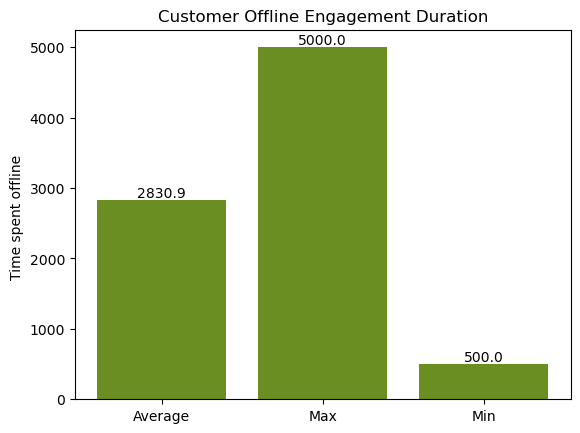

In [19]:
offline_values = ["Average", "Max", "Min"]
offline_nums = online_nums = [2830.91, 5000.0, 500.0]
offline_specs = plt.bar(offline_values, offline_nums, color= 'olivedrab')
plt.ylabel("Time spent offline ")
plt.title("Customer Offline Engagement Duration")

for bar in offline_specs:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

In [20]:
#how many diffrent coupon codes were used 
diffrent_coupons = marketing_df["Coupon_Code"].nunique()
print(diffrent_coupons)

48
